## Preparations

Make sure that module can be exported in notebook

In [1]:
import sys
sys.path.append('../')

## Read ALS Level-1 point cloud file

Point cloud data from the airborne lasers canner is of processing level 1b. The product consists of structured binary files that contain a header column, a mapping variable that allows to read selected parts of the data sequentially and the data itself. 

Accessing the data is a two step process: 

### Connect to Metadata and time mapping

Connecting the binary file. In this step the metadata and time mapping variable will be parsed. This information is necessary to decode the structured binary file and allow reading only selected portions of the data file


In [2]:
from awi_als_toolbox import AirborneLaserScannerFileV2
als_file = AirborneLaserScannerFileV2("als_l1b_vq580_wgs84_20191029T024650_20191029T024719.alsbin2", device_name_override="VQ580")

2022-04-23 11:01:34.303 | INFO     | awi_als_toolbox._bindata:_parse_header:464 - als_header.byte_size: 39


Notes:
- The laser scanner file is not part of the github repository


#### Header Information

The header information returned by `AirborneLaserScannerFileV2` can be found in the property `header`, which again has a list of properties:


In [3]:
als_file.header.__dict__

{'device_name_override': 'VQ580',
 '_header_info_dict': {'scan_lines': 3845,
  'data_points_per_line': 1081,
  'bytes_per_line': 57341,
  'bytes_sec_line': 15380,
  'year': 2019,
  'month': 10,
  'day': 29,
  'start_time_sec': 10011,
  'stop_time_sec': 10039,
  'device_name': 'VQ580'},
 'header_dict': OrderedDict([('scan_lines', [4, '>L']),
              ('data_points_per_line', [2, '!H']),
              ('bytes_per_line', [4, '>L']),
              ('bytes_sec_line', [8, '>Q']),
              ('year', [2, '>H']),
              ('month', [1, '>b']),
              ('day', [1, '>b']),
              ('start_time_sec', [4, '>L']),
              ('stop_time_sec', [4, '>L']),
              ('device_name', [8, '>8s'])]),
 'byte_size': 39,
 '_status': 0,
 '_status_context': ''}

#### Start and End Time of the file

The selection of indiviual segments of the data file is realized by the timestamp, defined as the second since the start of of the UTC day. Usually between 0 and 86400, the expected behaviour for a date change in a file are seconds > 86400. The selection of data segments can only be done to the full second (integer values).

#### Order of data points

For historical reasons, the scanner data is ordered in 2D structures with the dimensions: (number of scan lines, data points per scan lines).


### Extract data

The `get_data()` method can be used to parse and decode the binary data. Without any arguments, the entire file will be parsed:

In [4]:
als = als_file.get_data()
als.dims

2022-04-23 11:01:34.461 | DEBUG    | awi_als_toolbox._bindata:_get_line_range:292 - Line Range: 0 - 3724
2022-04-23 11:01:34.463 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 0%
2022-04-23 11:01:39.722 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 10%
2022-04-23 11:01:44.691 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 20%
2022-04-23 11:01:50.005 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 30%
2022-04-23 11:01:57.281 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 40%
2022-04-23 11:02:06.564 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 50%
2022-04-23 11:02:13.288 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 60%
2022-04-23 11:02:18.503 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 70%
2022-04-23 11:02:25.303 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 80%
2022-04-23 11:02:33.149 | INFO     | awi_als_toolb

(3725, 1081)

Specifying a time coverage in seconds will result only to read a segment of the file, e.g. a 5 second segment:

In [5]:
als = als_file.get_data(10020, 10025)
als.dims

2022-04-23 11:02:42.779 | DEBUG    | awi_als_toolbox._bindata:_get_line_range:292 - Line Range: 1160 - 1834
2022-04-23 11:02:42.793 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 0%
2022-04-23 11:02:43.921 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 10%
2022-04-23 11:02:44.902 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 20%
2022-04-23 11:02:45.766 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 30%
2022-04-23 11:02:46.745 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 40%
2022-04-23 11:02:47.851 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 50%
2022-04-23 11:02:48.865 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 60%
2022-04-23 11:02:50.044 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 70%
2022-04-23 11:02:51.051 | INFO     | awi_als_toolbox._bindata:get_data:132 - Parse lines: 80%
2022-04-23 11:02:52.016 | INFO     | awi_als_to

(675, 1081)

The als data object has the following metadata attributes that give a general spatial and temporal overview of the chosen segment

In [6]:
als.metadata.attribute_dict

{'geospatial_lat_min': 85.7460209819569,
 'geospatial_lat_max': 85.7491450889892,
 'geospatial_lon_min': 125.94585921911154,
 'geospatial_lon_max': 125.99296076531205,
 'geospatial_vertical_min': -1.7843544110655785,
 'geospatial_vertical_max': 0.5494814915582538,
 'time_coverage_start': '2019-10-29T02:46:59.998712',
 'time_coverage_end': '2019-10-29T02:47:04.996569',
 'cdm_data_type': 'point'}

The als data object has the following variables (per shot)

In [7]:
als.shot_variables

dict_keys(['timestamp', 'latitude', 'longitude', 'elevation', 'elevation_reference', 'amplitude', 'reflectance', 'echo_width', 'n_echoes', 'weights'])

The als data object has the following variables (per scan line)

In [8]:
als.line_variables

dict_keys(['aircraft_latitude', 'aircraft_longitude', 'aircraft_altitude', 'aircraft_pitch', 'aircraft_roll', 'aircraft_true_heading', 'fov_min', 'fov_max', 'range_min', 'range_max'])

The `get()` method can be used to access and store individual data variables

In [9]:
als.get("aircraft_true_heading")

array([158.63841, 158.63747, 158.63644, 158.63535, 158.63412, 158.63275,
       158.63121, 158.62949, 158.62756, 158.6255 , 158.6233 , 158.62102,
       158.61864, 158.61623, 158.6138 , 158.61137, 158.60898, 158.60664,
       158.6044 , 158.60226, 158.60028, 158.59843, 158.59674, 158.5952 ,
       158.59378, 158.5925 , 158.59134, 158.59029, 158.58934, 158.5885 ,
       158.58777, 158.58711, 158.58655, 158.58606, 158.58563, 158.58525,
       158.58487, 158.58447, 158.58401, 158.58347, 158.58281, 158.58199,
       158.58098, 158.57976, 158.57828, 158.57652, 158.57446, 158.57204,
       158.56927, 158.56622, 158.56294, 158.5595 , 158.55594, 158.5523 ,
       158.54869, 158.54514, 158.54169, 158.53842, 158.53539, 158.53264,
       158.53024, 158.52824, 158.52663, 158.52533, 158.5243 , 158.52353,
       158.52295, 158.5225 , 158.52216, 158.52188, 158.5216 , 158.5213 ,
       158.5209 , 158.5204 , 158.51971, 158.51884, 158.51779, 158.51657,
       158.51523, 158.51373, 158.51215, 158.51045, 

In [10]:
elevation = als.get("elevation")
elevation.shape

(675, 1081)

## Quick statistics & visualization

In [11]:
import numpy as np

print('Mean elevation: %.2f m (above the DTU21 mean sea surface)' % np.nanmean(elevation))
print('Standard deviation of elevation: %.2f m' % np.nanstd(elevation))

Mean elevation: -1.43 m (above the DTU21 mean sea surface)
Standard deviation of elevation: 0.18 m


Text(0.5, 0, 'Elevation (metres above the DTU21 mean sea surface)')

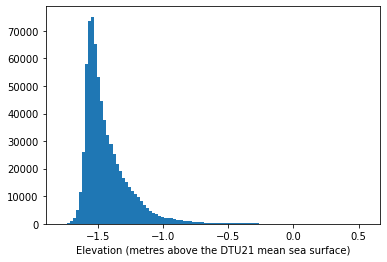

In [12]:
import matplotlib.pyplot as plt 

plt.figure()
plt.hist(elevation[np.isfinite(elevation)], bins=100)
plt.xlabel("Elevation (metres above the DTU21 mean sea surface)")

Text(0.5, 0, 'Reflectance (dB)')

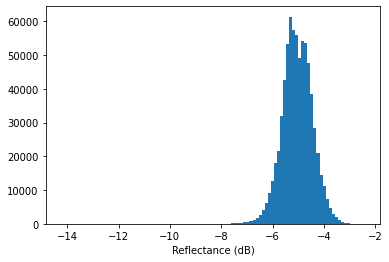

In [13]:
reflectance = als.get("reflectance")
plt.figure()
plt.hist(reflectance[np.isfinite(reflectance)], bins=100)
plt.xlabel("Reflectance (dB)")

In [14]:
lat = als.get("latitude")
lon = als.get("longitude")

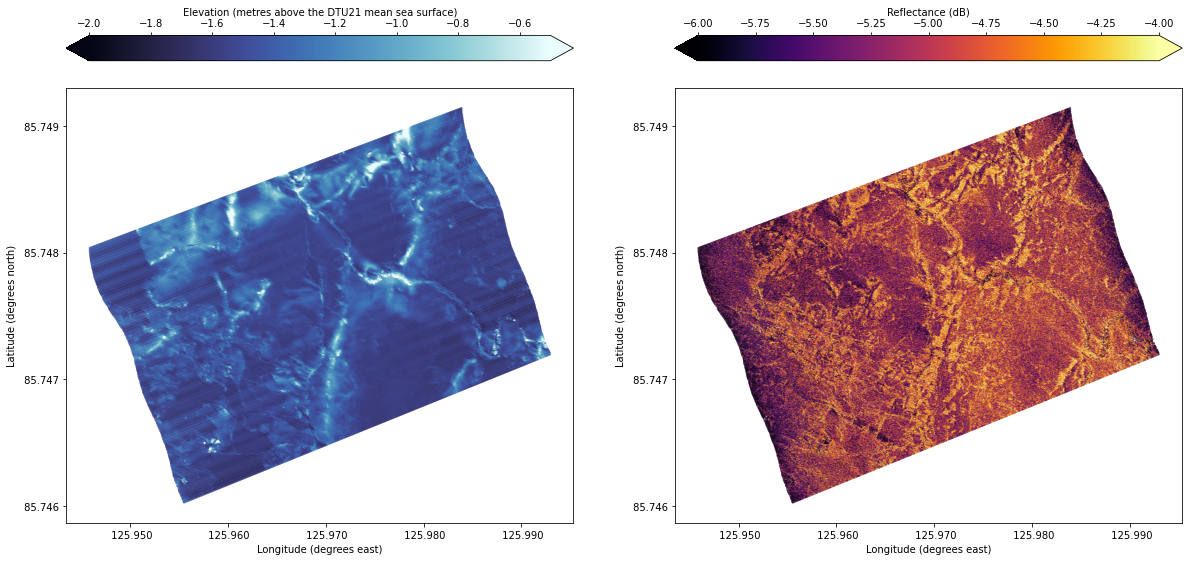

In [15]:
import cmocean
from matplotlib.ticker import FormatStrFormatter,MultipleLocator

fig,ax = plt.subplots(1,2,figsize=(20,10))

# Plot elevation point cloud
elevpointcloud = ax[0].scatter(lon, lat, 
                               c=elevation, 
                               cmap=cmocean.cm.ice,  
                               vmin=-2, 
                               vmax=-0.5, 
                               marker='.', 
                               s=.1)
# Add colorbar
fig.colorbar(elevpointcloud, 
             ax=ax[0], 
             extend="both", 
             location="top",
             orientation="horizontal",
             label="Elevation (metres above the DTU21 mean sea surface)")

# Plot reflectance point cloud
reflpointcloud = ax[1].scatter(lon, lat, 
                               c=reflectance, 
                               cmap='inferno', 
                               vmin=-6, 
                               vmax=-4, 
                               marker='.', 
                               s=.1)
# Add colorbar
fig.colorbar(reflpointcloud, 
             ax=ax[1], 
             extend="both", 
             location="top",
             orientation="horizontal",
             label="Reflectance (dB)")

# Adjust axes
for iax in ax:
    iax.xaxis.set_major_formatter(FormatStrFormatter('% 1.3f'))
    iax.yaxis.set_major_formatter(FormatStrFormatter('% 1.3f'))
    iax.yaxis.set_major_locator(MultipleLocator(0.001))
    iax.set_xlabel("Longitude (degrees east)")
    iax.set_ylabel("Latitude (degrees north)")

# Save figure
fig.savefig('fig.png', dpi=150)